In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import numpy as np
import ta


In [2]:
df = pd.read_csv("./AAPL_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[23:]
df['rsi'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()
stoch = ta.momentum.StochasticOscillator(df['High'], df['Low'], df['Close'], window=14)
df['k'] = stoch.stoch()
df['d'] = stoch.stoch_signal()
df

,Close,High,Low,Open,Volume,rsi,k,d
Date,,,,,,,,
2014-01-06,16.929031,17.018355,16.607525,16.727351,412610800,NaN,NaN,NaN
2014-01-07,16.807955,16.992205,16.741973,16.941163,317209200,NaN,NaN,NaN
2014-01-08,16.914400,16.979759,16.765941,16.769674,258529600,NaN,NaN,NaN
2014-01-09,16.698412,17.020229,16.661997,17.018361,279148800,NaN,NaN,NaN
2014-01-10,16.586985,16.831616,16.530028,16.801425,304976000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-22,192.444580,194.243775,191.818335,194.015137,37122800,54.672775,36.228828,52.092731
2023-12-26,191.897888,192.732871,191.679200,192.454544,28919300,53.090087,19.878324,38.505162
2023-12-27,191.997253,192.345171,189.949550,191.341204,48087700,53.354396,24.149990,26.752381


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split


# 取出收盤價
closing_prices = df['Close'][-254:-6]
closing_prices_true = closing_prices[40:]
# 定義滑動窗口
window_size = 40
predictions = []

# 使用40天作為滑動窗口預測下一天的價格
for i in range(window_size, len(closing_prices)):
    pred_sub = []
    # 當前窗口的數據
    train_data = closing_prices[i - window_size:i]
    train_data = train_data.tolist() 
    for i in range(0,1):
        # 訓練ARIMA模型
        model = ARIMA(train_data, order=(1, 1, 0))  # 可以根據AIC選擇合適的ARIMA參數
        model_fit = model.fit()
            
        # 預測下一天的收盤價
        pred = model_fit.forecast(steps=1)
        train_data.append(pred[0])
        train_data.pop(0)
    predictions.append(pred[0])
print(predictions)


[147.87395648717316, 145.27964930511254, 146.40350743513847, 145.95443028260817, 143.84615240486022, 144.45835561633612, 149.8427236151544, 152.61388227136618, 149.91174686904805, 151.4170091331719, 148.98561564771197, 146.87784903362314, 149.0444792673183, 151.19719947444113, 151.48830262705442, 154.49693663627016, 153.43493683072927, 155.8028058780068, 157.71768415844306, 156.24146322620348, 157.32342595518284, 158.6716854103895, 156.6562467277085, 156.0629434826675, 159.0992993448748, 160.5701072965432, 163.1878740711872, 164.5632843180284, 163.92896331301964, 161.98147655205426, 163.07654981708433, 160.28468408917206, 159.09893185147467, 158.43627673047163, 164.4083718680223, 163.54042115483935, 163.5810131714967, 164.8649577080336, 166.01759873565885, 164.9315292032841, 163.23316324103044, 163.70564695086938, 162.0139206299369, 162.1241381428987, 167.0898427232812, 168.00559727244635, 167.89166429254286, 166.7756617015389, 165.6601441990575, 163.98594059127484, 172.04311376307382,

In [5]:
len(predictions)

208

In [4]:
import json
with open('test_price1.json', 'r') as f:
    loaded_list = json.load(f)
len(loaded_list)

208

In [5]:
from sklearn.metrics import r2_score
mae =  np.mean( np.absolute(np.array(loaded_list) - np.array(predictions)))
mape = np.mean(np.absolute(np.array(loaded_list) - np.array(predictions).reshape(-1))/np.array(loaded_list))
# 新增：RMSE
rmse = np.sqrt(np.mean((np.array(loaded_list) - np.array(predictions).reshape(-1)) ** 2))
# 新增：R²
r2 = r2_score(loaded_list, predictions)
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4%}")
print(f"R²:   {r2:.4f}")

MAE:  3.0515
RMSE: 3.8685
MAPE: 1.7465%
R²:   0.9025


In [7]:
import csv

with open('./5day/output.csv', mode='r', newline='') as file:
    reader = csv.reader(file)
    rows = list(reader)

for i in range(len(predictions)):
    rows[i].append(predictions[i].item())

# 寫回檔案
with open('./5day/output.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

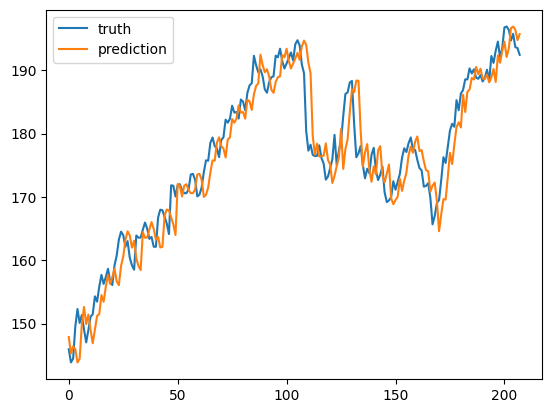

In [6]:
plt.plot(loaded_list)
plt.plot(predictions)
plt.legend(['truth', 'prediction'])

In [6]:
btdf = pd.DataFrame({'close':loaded_list, 'rsi':df['rsi'][-213:-5],'predicted_close':predictions})

In [7]:
btdf =btdf.dropna().reset_index(drop=True)

In [8]:
btdf

,close,rsi,predicted_close
0,145.938231,51.156497,147.873956
1,143.859212,50.113081,145.279649
2,144.453247,45.956772,146.403507
3,149.522094,47.301684,145.954430
4,152.294174,57.109864,143.846152
...,...,...,...
203,194.720915,67.991856,196.658916
204,195.764663,62.680164,196.921823
205,193.667254,64.544497,196.411211
206,193.518132,58.247490,194.774966


買入價格: 144.45324687238903
賣出價格: 152.29417396629384
cash: 1054274.897344009
額外要扣掉: 4508.754074731227
扣掉後的: 1049766.1432692779
-------------------------------------
買入價格: 149.08650035201651
賣出價格: 151.46254246887372
cash: 1066495.8558140695
額外要扣掉: 4615.417132414875
扣掉後的: 1061880.4386816546
-------------------------------------
買入價格: 158.6500517645144
賣出價格: 156.69975498585313
cash: 1048827.1023420747
額外要扣掉: 4580.998899471927
扣掉後的: 1044246.1034426028
-------------------------------------
買入價格: 156.0760016334782
賣出價格: 160.73898442294367
cash: 1075441.4583041267
額外要扣掉: 4633.71696294528
扣掉後的: 1070807.7413411816
-------------------------------------
買入價格: 163.0160225327114
賣出價格: 163.5605445717036
cash: 1074384.1620932822
額外要扣掉: 4668.474705534034
扣掉後的: 1069715.6873877482
-------------------------------------
買入價格: 164.80796479118845
賣出價格: 165.95639181424193
cash: 1077168.9787673652
額外要扣掉: 4675.064117422085
扣掉後的: 1072493.9146499431
-------------------------------------
買入價格: 163.679332083158
賣出價格:

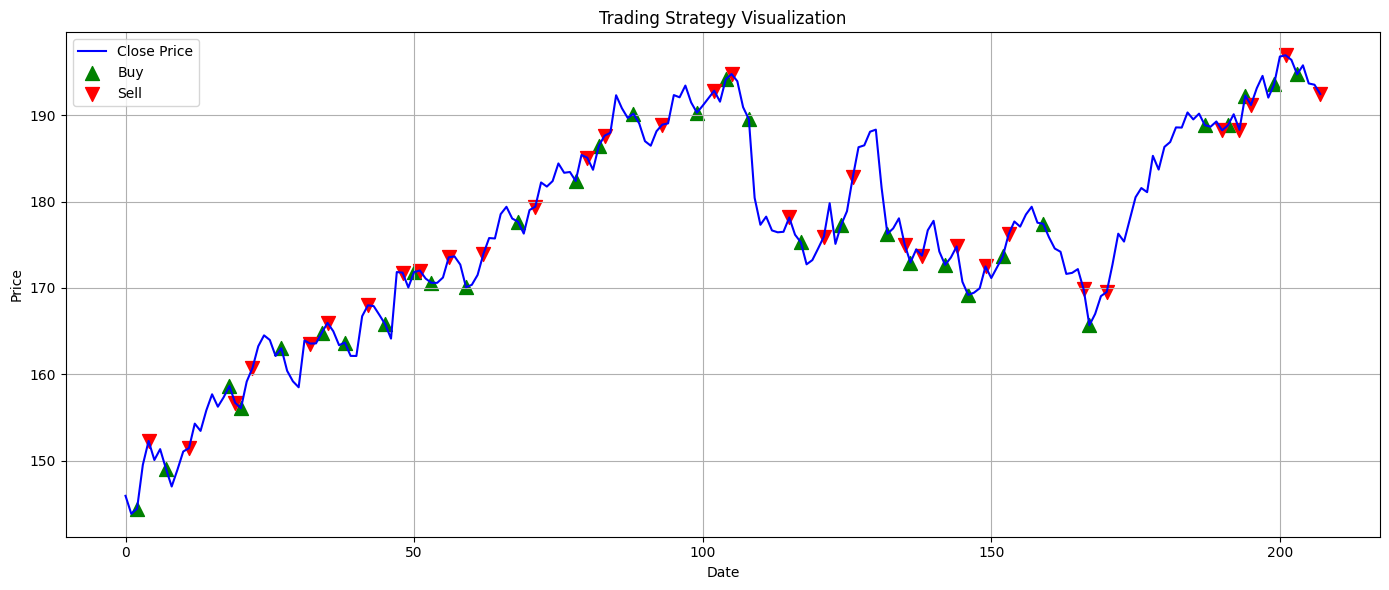

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 初始化參數
initial_cash = 1000000
in_position = False
entry_price = 0
shares = 0
cash = initial_cash

# 儲存交易點資訊
buy_dates = []
buy_prices = []
sell_dates = []
sell_prices = []

# 手續費和稅率
fee_rate = 0.001425  # 手續費率 (1.425‰)
tax_rate = 0.0015     # 證券交易稅率 (1‰)
need_pay = 0 #需要付的手續費+稅金

# 模擬交易
for i in range(1, len(btdf)):
    if not in_position:
        need_pay = 0
        if btdf.loc[i, 'predicted_close'] > btdf.loc[i - 1, 'close']:
            entry_price = btdf.loc[i, 'close']
            shares = cash // entry_price
            need_pay += cash * fee_rate
            cash -= shares * entry_price
            in_position = True

            buy_dates.append(btdf.index[i])
            buy_prices.append(entry_price)

            print('買入價格:', entry_price)

    else:
        if btdf.loc[i, 'predicted_close'] < btdf.loc[i - 1, 'close']:
            exit_price = btdf.loc[i, 'close']
            cash += shares * exit_price
            need_pay += cash * (fee_rate + tax_rate)
            shares = 0
            in_position = False

            sell_dates.append(btdf.index[i])
            sell_prices.append(exit_price)

            print('賣出價格:', exit_price)
            print('cash:', cash)
            print('額外要扣掉:', need_pay)
            cash -= need_pay
            print('扣掉後的:', cash)
            print('-------------------------------------')

# 最後一天強制平倉
if in_position:
    final_price = btdf.loc[len(btdf) - 1, 'close']
    cash += shares * final_price
    sell_dates.append(btdf.index[-1])
    sell_prices.append(final_price)
    print('賣出價格:', final_price)

# 顯示最終資金
print('最終價格:', cash)

# 繪圖
plt.figure(figsize=(14, 6))
plt.plot(btdf.index, btdf['close'], label='Close Price', color='blue')

# 標記買進與賣出點
plt.scatter(buy_dates, buy_prices, color='green', label='Buy', marker='^', s=100)
plt.scatter(sell_dates, sell_prices, color='red', label='Sell', marker='v', s=100)

plt.title('Trading Strategy Visualization')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


買入價格: 144.45324687238903
賣出價格: 190.80201927716467
cash: 1320826.2025858571
額外要扣掉: 5288.416642563632
扣掉後的: 1315537.7859432935
-------------------------------------
買入價格: 190.1576067571169
賣出價格: 192.44457986169954
最終價格: 1331359.0658807962


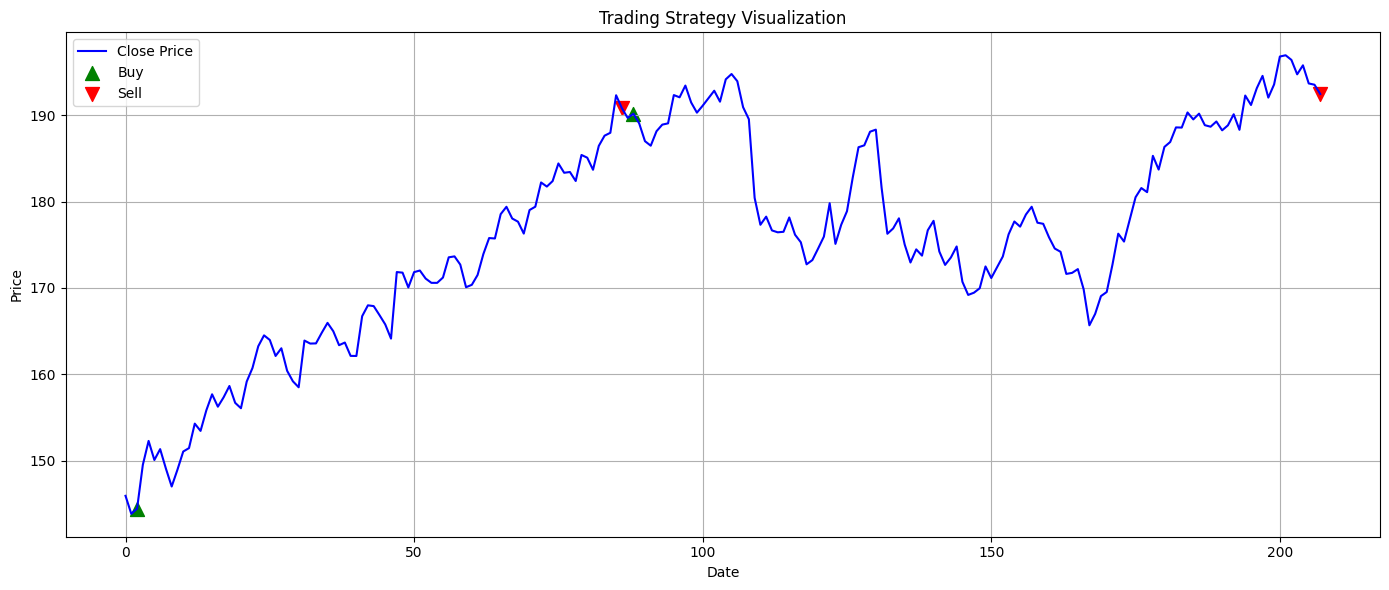

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 初始化參數
initial_cash = 1000000
in_position = False
entry_price = 0
shares = 0
cash = initial_cash

# 儲存交易點資訊
buy_dates = []
buy_prices = []
sell_dates = []
sell_prices = []

# 手續費和稅率
fee_rate = 0.001425  # 手續費率 (1.425‰)
tax_rate = 0.0015     # 證券交易稅率 (1.5‰)
need_pay = 0 #需要付的手續費+稅金

# 模擬交易
for i in range(1, len(btdf)):
    if not in_position:
        need_pay = 0
        if btdf.loc[i, 'predicted_close'] > btdf.loc[i - 1, 'close']:
            entry_price = btdf.loc[i, 'close']
            shares = cash // entry_price
            need_pay += cash * fee_rate
            cash -= shares * entry_price
            in_position = True

            buy_dates.append(btdf.index[i])
            buy_prices.append(entry_price)

            print('買入價格:', entry_price)

    else:
        if btdf.loc[i, 'rsi'] > 76.032 and btdf.loc[i, 'predicted_close'] < btdf.loc[i - 1, 'close']:
            exit_price = btdf.loc[i, 'close']
            cash += shares * exit_price
            need_pay += cash * (fee_rate + tax_rate)
            shares = 0
            in_position = False

            sell_dates.append(btdf.index[i])
            sell_prices.append(exit_price)

            print('賣出價格:', exit_price)
            print('cash:', cash)
            print('額外要扣掉:', need_pay)
            cash -= need_pay
            print('扣掉後的:', cash)
            print('-------------------------------------')

# 最後一天強制平倉
if in_position:
    final_price = btdf.loc[len(btdf) - 1, 'close']
    cash += shares * final_price
    sell_dates.append(btdf.index[-1])
    sell_prices.append(final_price)
    print('賣出價格:', final_price)

# 顯示最終資金
print('最終價格:', cash)

# 繪圖
plt.figure(figsize=(14, 6))
plt.plot(btdf.index, btdf['close'], label='Close Price', color='blue')

# 標記買進與賣出點
plt.scatter(buy_dates, buy_prices, color='green', label='Buy', marker='^', s=100)
plt.scatter(sell_dates, sell_prices, color='red', label='Sell', marker='v', s=100)

plt.title('Trading Strategy Visualization')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split


# 取出收盤價
closing_prices = df['Close'][-254:-6]
# 定義滑動窗口
window_size = 40
predictions = []

# 使用40天作為滑動窗口預測下一天的價格
for i in range(window_size, len(closing_prices)):
    pred_sub = []
    # 當前窗口的數據
    train_data = closing_prices[i - window_size:i]
    train_data = train_data.tolist() 
    for i in range(0,5):
        # 訓練ARIMA模型
        model = ARIMA(train_data, order=(1, 1, 0))  # 可以根據AIC選擇合適的ARIMA參數
        model_fit = model.fit()
            
        # 預測下一天的收盤價
        pred = model_fit.forecast(steps=1)
        pred_sub.append(pred[0])
        train_data.append(pred[0])
        train_data.pop(0)
    predictions.append(pred_sub)
print(predictions)

[[147.87395648717316, 147.87418486225275, 147.87418207937128, 147.87418209406556, 147.87418209449726], [145.27964930511254, 145.27901933265915, 145.27902715700012, 145.27902731958034, 145.2790273244996], [146.40350743513847, 146.4046620670976, 146.40466618875135, 146.40466624176327, 146.40466624449522], [145.95443028260817, 145.9544397101631, 145.95443980228137, 145.95443980670154, 145.95443980684968], [143.84615240486022, 143.84595259739257, 143.8459419688587, 143.84594155289594, 143.84594153733514], [144.45835561633612, 144.458588442646, 144.45859577921803, 144.45859599764154, 144.45859600230537], [149.8427236151544, 149.8591340857918, 149.85994994666726, 149.85998526922455, 149.8599868408224], [152.61388227136618, 152.65033824048072, 152.65436103083061, 152.65480982564716, 152.654860610328], [149.91174686904805, 149.8987877661735, 149.89781125435462, 149.897736474037, 149.8977313028848], [151.4170091331719, 151.42135961575363, 151.42162263331582, 151.4216365664844, 151.4216373663772

In [15]:
len(predictions)

208

In [16]:
import json
with open('test_price.json', 'r') as f:
    loaded_list = json.load(f)
len(loaded_list)

208

In [17]:
mae =  np.mean( np.absolute(np.array(loaded_list) - np.array(predictions)))
mape = np.mean(np.absolute(np.array(loaded_list) - np.array(predictions))/np.array(loaded_list))
# 新增：RMSE
rmse = np.sqrt(np.mean((np.array(loaded_list) - np.array(predictions)) ** 2))
# 新增：R²
r2 = r2_score(loaded_list, predictions)
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4%}")
print(f"R²:   {r2:.4f}")

MAE:  3.9572
RMSE: 5.0915
MAPE: 2.2513%
R²:   0.8212
